### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Parameters  

### Read CSV files  

In [3]:
df = pd.read_csv("./covid-19-pref-area-20200403.csv", sep=',', comment="#", header=0)
print(df.shape)
print(df.info())
display(df.head())

(47, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pref        47 non-null     object 
 1   Pop(100k)   47 non-null     float64
 2   Infected    47 non-null     int64  
 3   Discharged  47 non-null     int64  
 4   PCR         47 non-null     int64  
 5   Area        47 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ KB
None


,Pref,Pop(100k),Infected,Discharged,PCR,Area
0,Hokkaido,53.2,190,130,2803,Hokkaido
1,Aomori,12.8,11,0,249,Tohoku
2,Iwate,12.6,0,0,69,Tohoku
3,Miyagi,23.2,13,1,479,Tohoku
4,Akita,10.0,9,2,358,Tohoku


### Histogram  

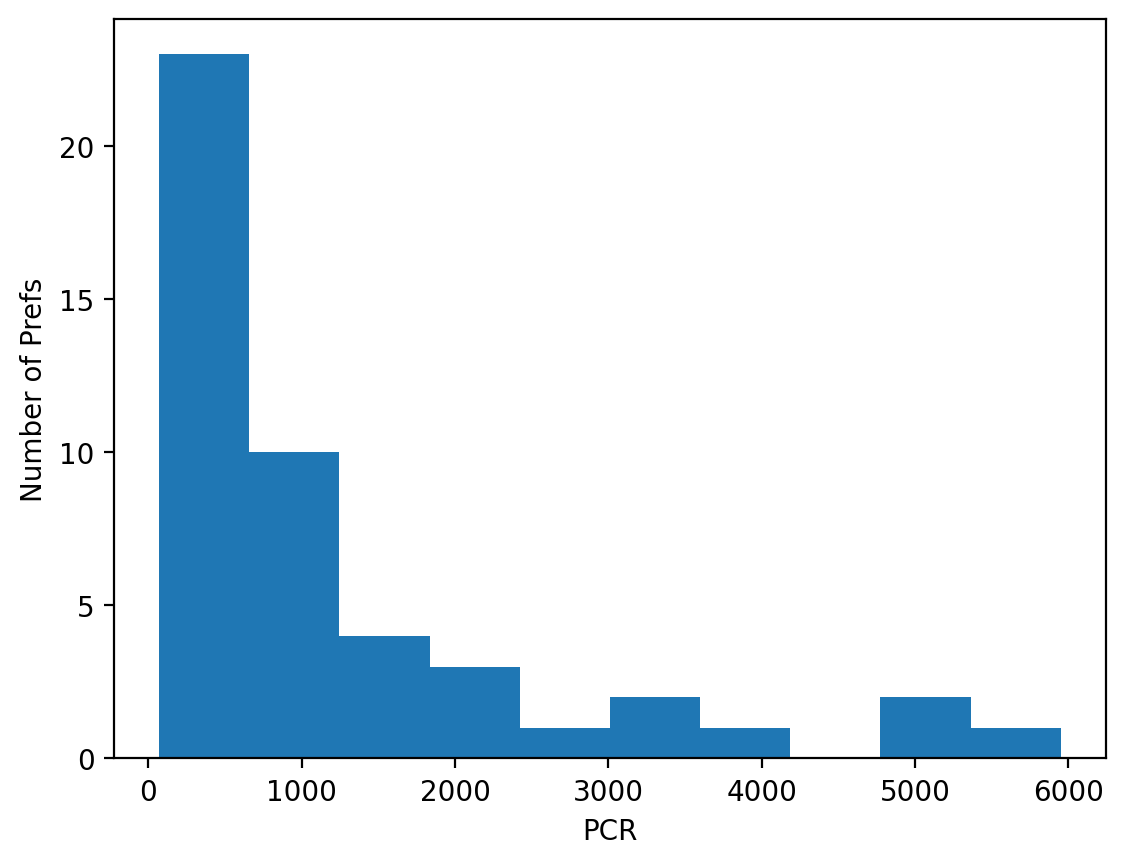

In [4]:
ser_aclose = df["PCR"]
plt.hist(ser_aclose, bins=10)
plt.xlabel('PCR')
plt.ylabel('Number of Prefs')
plt.show()

### Multiple box plot

,Infected,Discharged
0,190,130
1,11,0
2,0,0
3,13,1
4,9,2


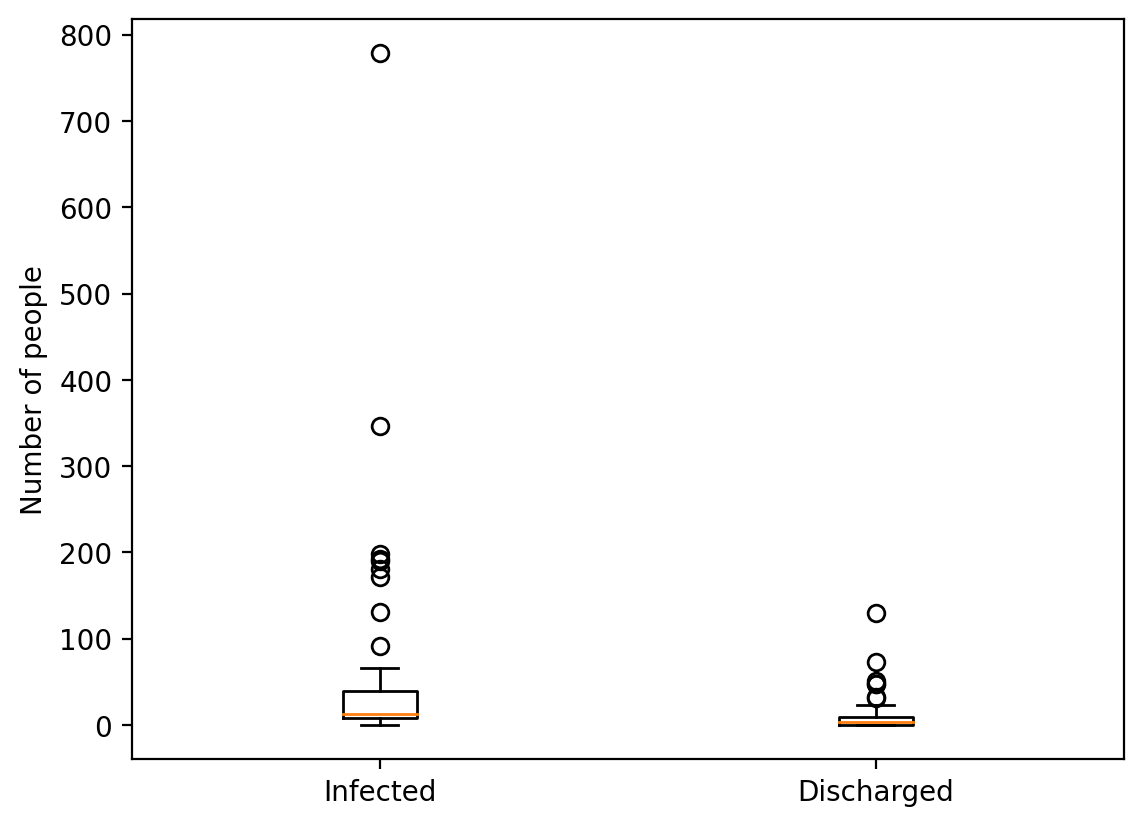

In [10]:
df_num = df[["Infected", "Discharged"]]
display(df_num.head())
plt.boxplot(df_num, labels=df_num.columns)
plt.ylabel('Number of people')
plt.show()

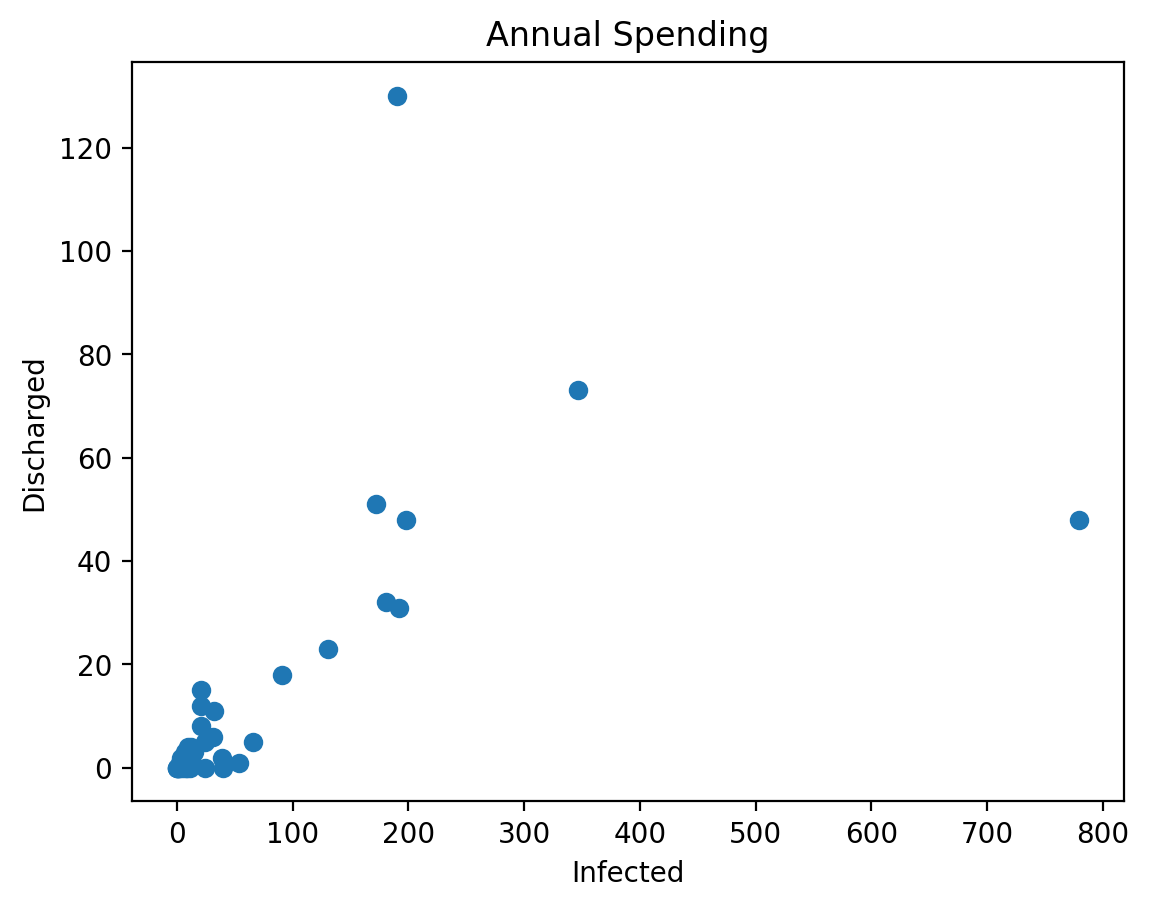

In [ ]:
ser_fresh = df['Infected']
ser_milk = df['Discharged']
plt.scatter(ser_fresh, ser_milk, marker='o')
plt.xlabel('Infected')
plt.ylabel('Discharged')

plt.show()

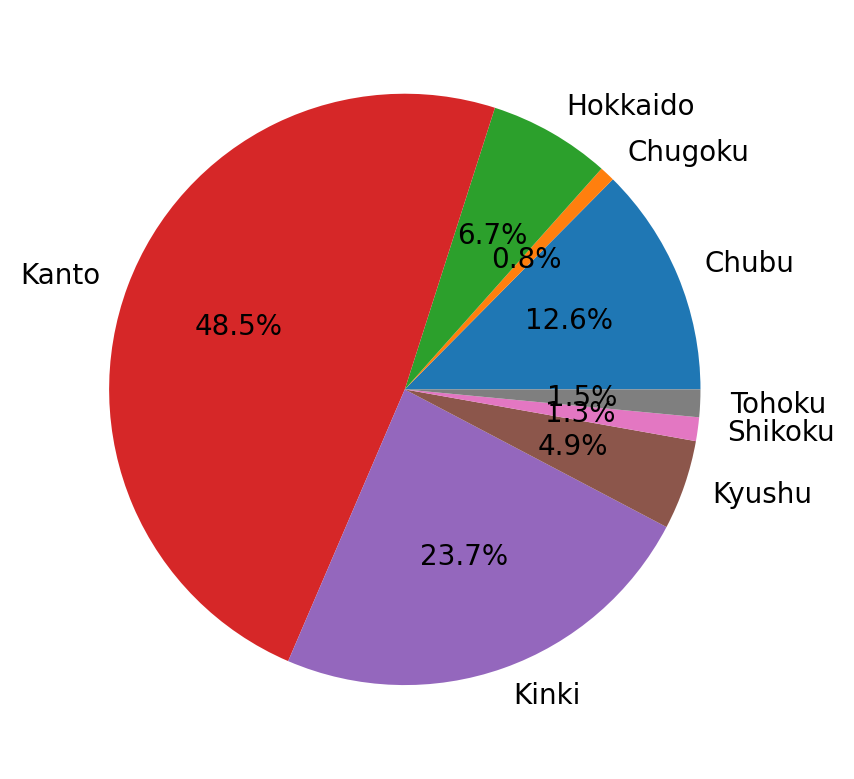

In [15]:
df_area = df.groupby("Area").sum()
plt.pie(df_area["Infected"], autopct="%.1f%%", labels=df_area.index)
plt.show()

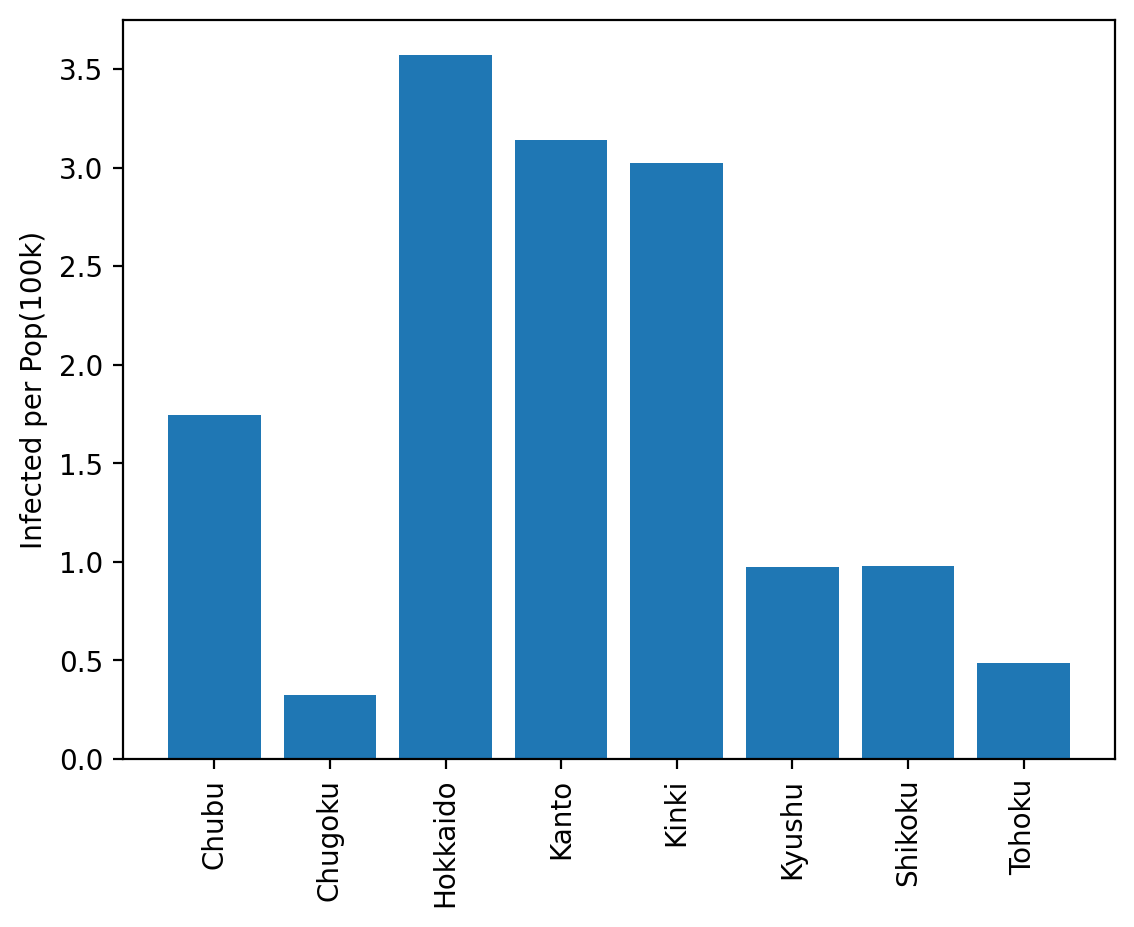

In [20]:
df_area["Infected_rate"] = df_area["Infected"] / df_area["Pop(100k)"]
plt.bar(df_area.index, df_area["Infected_rate"])
plt.ylabel('Infected per Pop(100k)')
plt.xticks(rotation=90)
plt.show()

In [23]:
df_jpn = pd.read_csv("./covid-19-japan-20200407.csv", comment="#", sep=",", header=0)
print(df_jpn.shape)
print(df_jpn.info())
display(df_jpn.head())

(57, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          57 non-null     object
 1   Infected_day  57 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None


,Date,Infected_day
0,2020-02-06,16
1,2020-02-07,0
2,2020-02-10,0
3,2020-02-12,0
4,2020-02-13,1


In [25]:
df_jpn["Date"] = pd.to_datetime(df_jpn["Date"])
print(df_jpn.info())
display(df_jpn.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          57 non-null     datetime64[ns]
 1   Infected_day  57 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB
None


,Date,Infected_day
0,2020-02-06,16
1,2020-02-07,0
2,2020-02-10,0
3,2020-02-12,0
4,2020-02-13,1


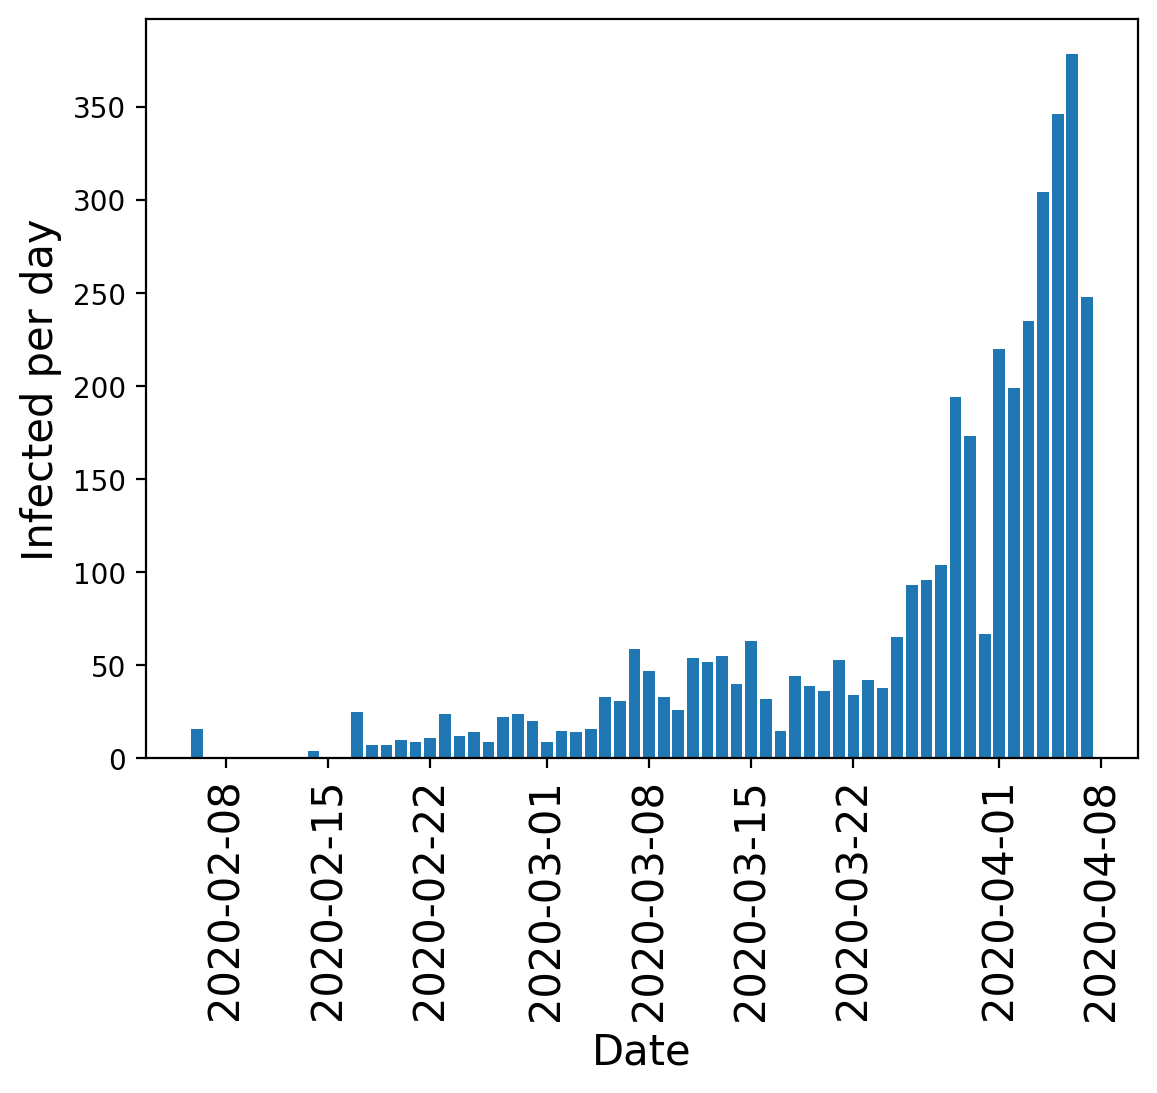

In [31]:
jpn_date = df_jpn['Date']
jpn_inf_day = df_jpn['Infected_day']
plt.bar(jpn_date, jpn_inf_day)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Infected per day', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

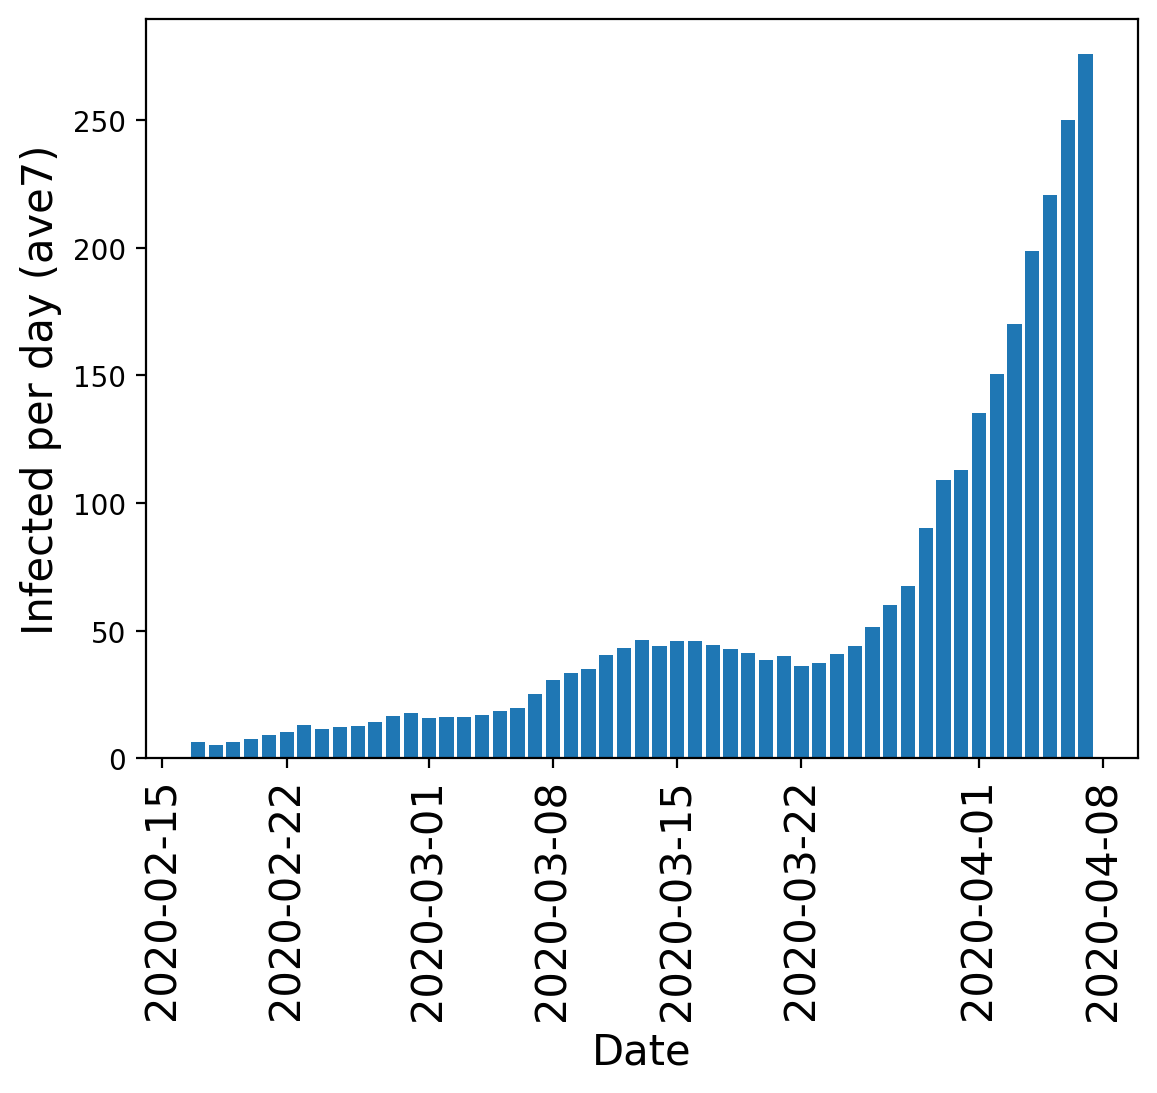

In [35]:
jpn_date = df_jpn['Date']
jpn_inf_day = df_jpn['Infected_day']
jpn_inf_ave = jpn_inf_day.rolling(window=7).mean()
plt.bar(jpn_date, jpn_inf_ave)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Infected per day (ave7)', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

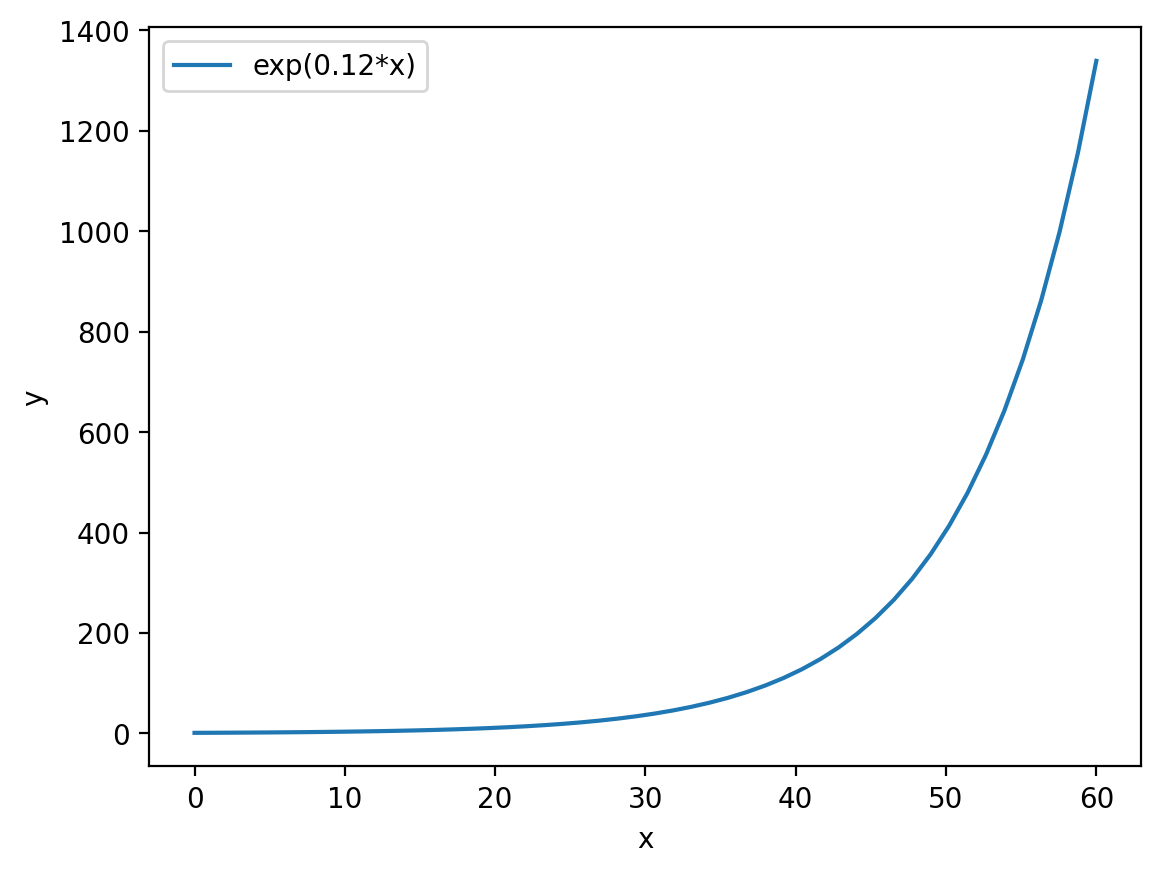

In [37]:
x = np.linspace(0, 60)
y = np.exp(0.12*x)
plt.plot(x, y, label="exp(0.12*x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()